# Prosper Loan Data Exploration
**by Luisa Mayorga**

## Investigation Overview

> The objective of this investigation is to understand the most significant factors in predicting borrower APR.

## Dataset Overview
> The dataset contains information for 83,982 loans. Each row has information about the borrower's APR, status, borrowed amount, debt, etc.

In [1]:
# Importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load csv into pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Adding toggle feature to hide code in slides
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

## Distribution of Loans by Year, Month, and Day of Month
> There is an upward trend with number of loans increasing each year. January has the highest amount of loans listed with April being the lowest and not much variation based on day of the month.

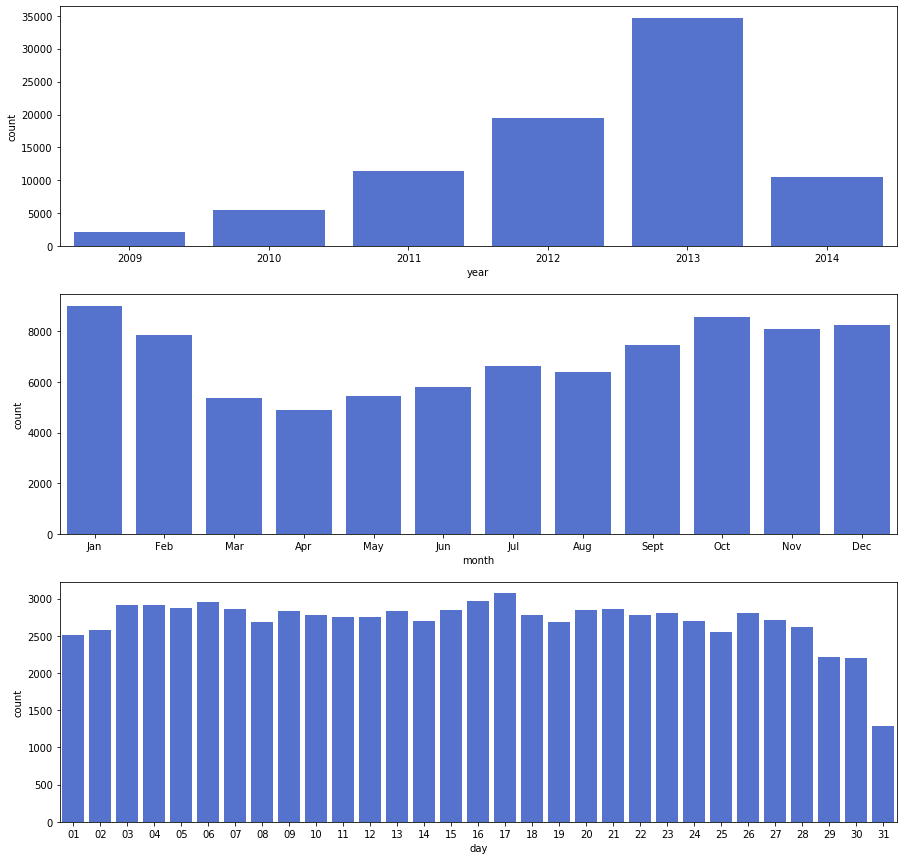

In [49]:
# Building countplots of loans 
# Displayed by year, month, and day
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'year', color = 'royalblue', ax = ax[0])
sb.countplot(data = df_loan, x = 'month', color = 'royalblue', ax = ax[1])
sb.countplot(data = df_loan, x = 'day', color = 'royalblue', ax = ax[2]);

hide_toggle()

## Distribution of Borrower APR
> The distribution of APR looks multimodal with a small peaks centered at 0.1 and 0.3 and a sharp peak between 0.35 and 0.36. There are very few loans with an APR greater than 0.4.

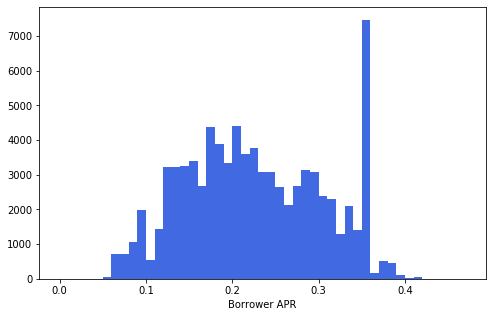

In [50]:
# Looking at distribution of borrow APR
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, color = 'royalblue', x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR');

hide_toggle()

# Borrower APR vs. Ratings
> As prosper ratings increase borrower APR decreases. Borrower's with the highest Prosper ratings have the lowest APR indicating a strong influence on borrower APR.

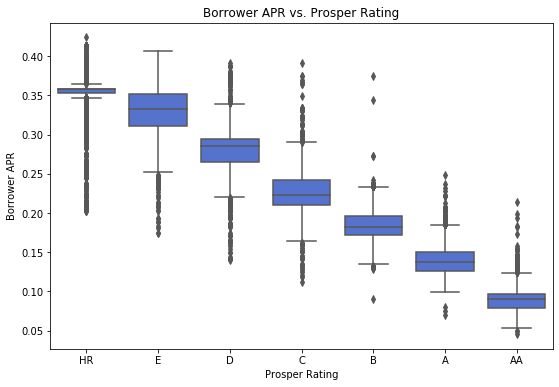

In [57]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=df_loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color='royalblue')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

hide_toggle()

# Borrower APR vs. Occupation
> Borrower APR varies with occupation. Students in technical school have the lowert average APR and college juniors have the highest average rating.

<Figure size 720x720 with 0 Axes>

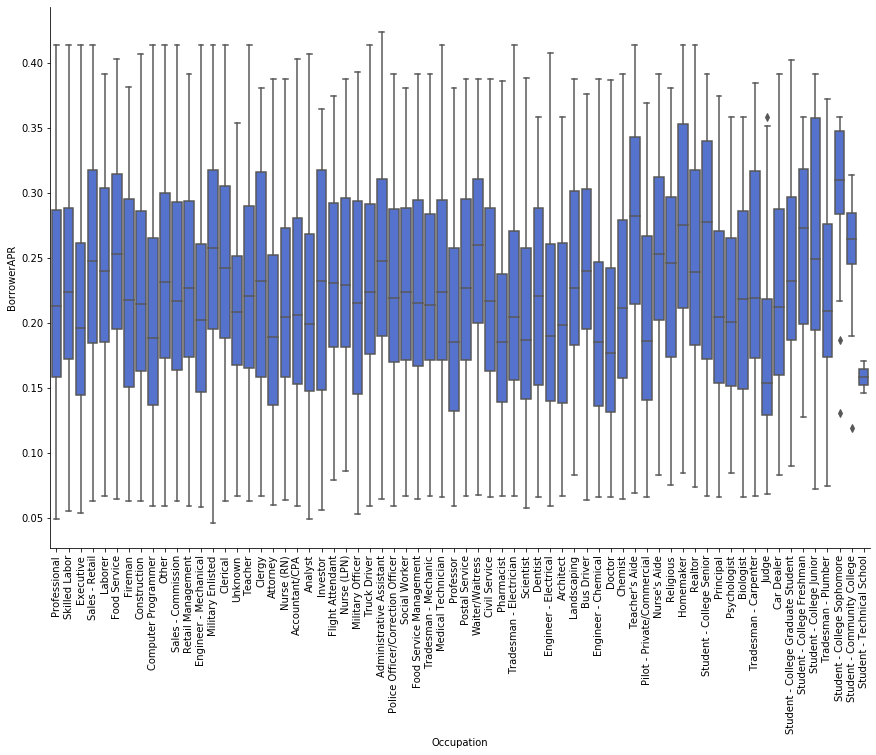

In [70]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = 'royalblue')

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR'], 
                x_vars = ['Occupation'] , height = 8, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

hide_toggle()

## Borrower APR vs Loan Amounts
> Borrower APR has a large range based on original loan amount. This range decreases as the original loan amount decreases indicating an overall negative correlation between borrow APR and original loan amount.

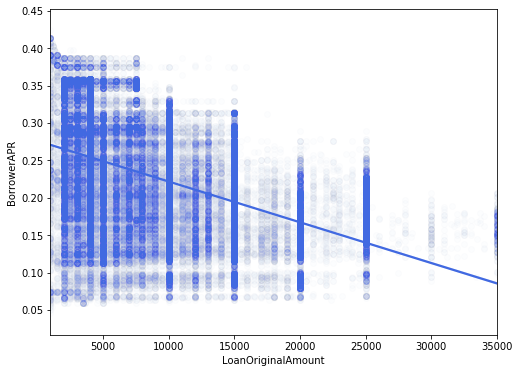

In [62]:
# Now looking at BorrowerAPR in relation to LoanOriginalAmount for all variables in the dataset
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, color = 'royalblue');

hide_toggle()

# The Effects of Ratings on APR and Original Loan Amount
> Borrower APR decreases as ratings increase. High ratings also lead to an increase in original loan amount. In ratings above B, we start to see an increase in APR associated with larger loan amounts. One possible explanation for this observation would be that the borrowers with A and AA ratings tend to borrow larger amounts and an increased APR prevents them from taking out larger loans while maximizing profits. Conversely, APR decreases with increasing loan amounts for borrowers with lower ratings of C, D, E, and HR. Since people with lower ratings typically loan smaller amounts, the decrease in APR with larger loans encourges those with lower ratings to borrow more. 

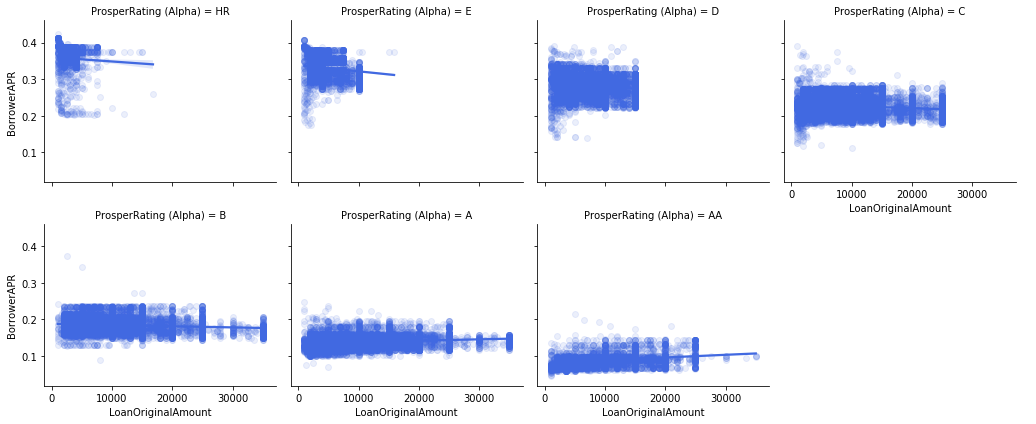

In [63]:
# Looking at the effects ProsperRating has on APR and LoanOriginalAmount
g=sb.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1}, color = 'royalblue')
g.add_legend();

hide_toggle()

# Borrower APR by Prosper Rating and Term
> For borrowers with ratings HR through C, APR decreases as term increases. For those with ratings greater than B, there is an increasing APR associated with longer terms. 

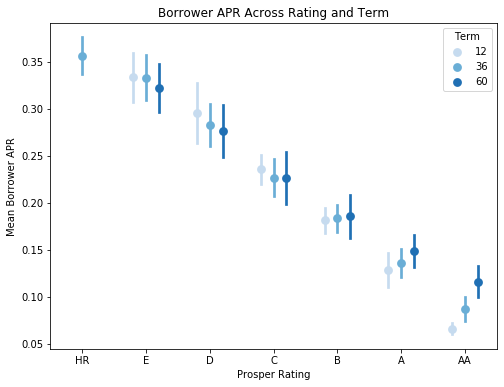

In [65]:
# Now looking at BorrowerAPR effects on ProsperRating and Term
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR Across Rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

hide_toggle()

# Prosper Ratings by Monthly Income, Loan Amount, and Term
> For stated monthly income, there doesn't seem to be an interaction between term and rating. The pattern is similar among different ratings. Here we do see a relationship between term and rating based on loan amount. With increasing ratings, we see an increase in all three terms. We also see that the amplitude for original loan amounts between terms increases with higher ratings. 

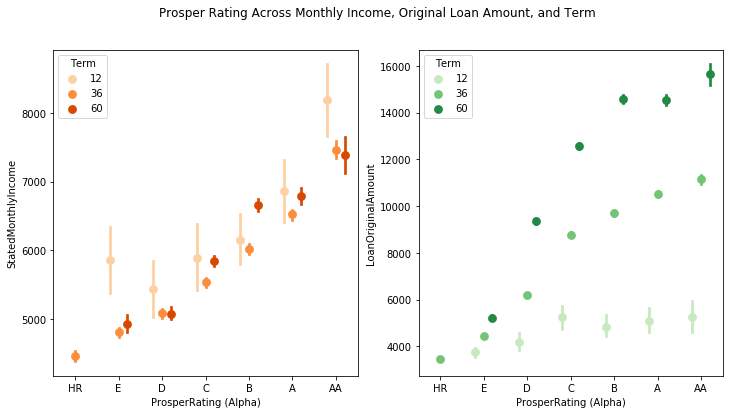

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Oranges', linestyles = '', dodge = 0.4, ax=ax[0])
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('StatedMonthlyIncome')
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('LoanOriginalAmount')
plt.suptitle('Prosper Rating Across Monthly Income, Original Loan Amount, and Term');

hide_toggle()

In [ ]:
!jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle